<a href="https://colab.research.google.com/github/Nour-Zayed/NLP/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade gensim -q


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text Preprocessing Library
import spacy
import re

# Word2Vec Model Library
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

# Models Libraries
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, accuracy_score

<ipython-input-26-859fce431e57>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Emotion', palette='light:#5A9')


<Axes: xlabel='Emotion', ylabel='count'>

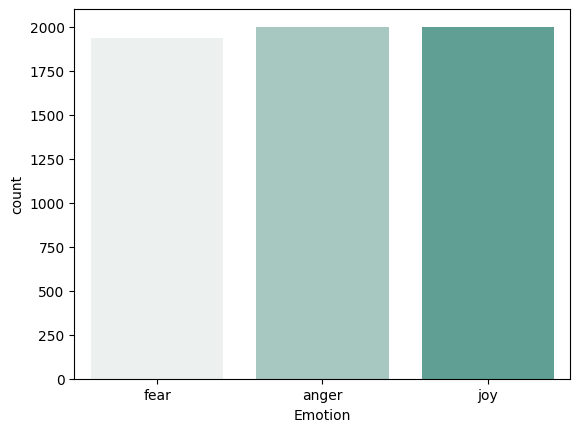

In [26]:
data = pd.read_csv('data.csv')

sns.countplot(data=data, x='Emotion', palette='light:#5A9')


In [27]:
nlp = spacy.load('en_core_web_sm')
stop_words = nlp.Defaults.stop_words

In [28]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [10]:
wv = api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [11]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    count = 1
    for word in sent:
        if word in wv:
            count+=1
            wv_res = wv[word]
    wv_res = wv_res/count # taking the average
    return wv_res

In [12]:
def preprocess(sentence):
    # Removing the numbers, special characters, etc from the sentence and replacing them with " "
    sentence = re.sub('[^a-zA-Z]',' ',sentence)
    # Converting sentence into a spacy doc - which is a sequence of tokens
    doc = nlp(sentence)
    # Lemmatization and lower casing the words
    tokens = [word.lemma_.lower().strip() for word in doc]
    # Removing stop words and punctuations
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [30]:
data['tokens'] = data['Comment'].apply(preprocess)
data.head()

,Comment,Emotion,tokens
0,i seriously hate one subject to death but now ...,fear,"[seriously, hate, subject, death, feel, reluct..."
1,im so full of life i feel appalled,anger,"[m, life, feel, appalled]"
2,i sit here to write i start to dig out my feel...,fear,"[sit, write, start, dig, feeling, think, afrai..."
3,ive been really angry with r and i feel like a...,joy,"[ve, angry, r, feel, like, idiot, trust, place]"
4,i feel suspicious if there is no one outside l...,fear,"[feel, suspicious, outside, like, rapture, hap..."


In [31]:
data['vectors'] = data['tokens'].apply(sent_vec)
data.head()

,Comment,Emotion,tokens,vectors
0,i seriously hate one subject to death but now ...,fear,"[seriously, hate, subject, death, feel, reluct...","[-0.005340576, -0.022460938, 0.0031738281, 0.0..."
1,im so full of life i feel appalled,anger,"[m, life, feel, appalled]","[0.003491211, 0.056640625, 0.0625, -0.04296875..."
2,i sit here to write i start to dig out my feel...,fear,"[sit, write, start, dig, feeling, think, afrai...","[0.0021362305, 0.0140625, 0.00859375, 0.016699..."
3,ive been really angry with r and i feel like a...,joy,"[ve, angry, r, feel, like, idiot, trust, place]","[-0.023003472, 0.022569444, 0.0046657985, -0.0..."
4,i feel suspicious if there is no one outside l...,fear,"[feel, suspicious, outside, like, rapture, hap...","[-0.013741629, -0.0057547432, 0.0055803573, 0...."


In [32]:
def convert_to_num(record):
    if record == 'joy':
        return 1
    elif record == 'anger':
        return 2
    else:    # Assuming 'fear' maps to 0
        return 0





In [33]:
data['Emotion'] = data['Emotion'].apply(convert_to_num)
data.head()

,Comment,Emotion,tokens,vectors
0,i seriously hate one subject to death but now ...,0,"[seriously, hate, subject, death, feel, reluct...","[-0.005340576, -0.022460938, 0.0031738281, 0.0..."
1,im so full of life i feel appalled,2,"[m, life, feel, appalled]","[0.003491211, 0.056640625, 0.0625, -0.04296875..."
2,i sit here to write i start to dig out my feel...,0,"[sit, write, start, dig, feeling, think, afrai...","[0.0021362305, 0.0140625, 0.00859375, 0.016699..."
3,ive been really angry with r and i feel like a...,1,"[ve, angry, r, feel, like, idiot, trust, place]","[-0.023003472, 0.022569444, 0.0046657985, -0.0..."
4,i feel suspicious if there is no one outside l...,0,"[feel, suspicious, outside, like, rapture, hap...","[-0.013741629, -0.0057547432, 0.0055803573, 0...."


In [34]:
X = data['vectors'].to_list()
y = data['Emotion'].to_list()

In [35]:
# Spliting into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=0)

In [36]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "SVM" : SVC(),
    "Naive Bayes" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "KNN" : KNeighborsClassifier()

}

In [37]:
params = {
    "Logistic Regression" : {
        "C" : [100, 10, 1.0, 0.1, 0.01],
        "penalty" : ['l1', 'l2']
    },
    "SVM" : {
        "C" : [0.1, 1, 10, 100, 1000],
        "gamma" : [1, 0.1, 0.01, 0.001, 0.0001],
        "kernel" : ['rbf']
    },
    "Naive Bayes" : {
        "var_smoothing" : np.logspace(0,-9, num=100)
    },
    "Decision Tree" : {
        "max_depth" : [3, 4, 5, 10, 15]
    },
    "Random Forest" : {
        "n_estimators" : [100, 200, 300, 400],
        "max_depth" : [3, 5, 10],
        "min_samples_leaf" : [1, 2, 4]
    },
    "KNN" : {
        'n_neighbors' : [5, 7, 9, 11, 13, 15],
        'weights' : ['uniform', 'distance'],
        'metric' : ['minkowski', 'euclidean', 'manhattan']
    }
}

In [38]:
def evaluate_models(X_train, y_train, X_test, y_test, models, param):
    report = {}
    for i in range(len(list(models))):
        model = list(models.values())[i]
        para = param[list(models.keys())[i]]

        gs = GridSearchCV(model, para, cv=3)
        gs.fit(X_train, y_train)

        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_model_score = accuracy_score(y_train, y_train_pred)
        test_model_score = accuracy_score(y_test, y_test_pred)

        report[list(models.keys())[i]] = test_model_score

    return report

In [39]:
from sklearn.model_selection import GridSearchCV


In [40]:
model_report: dict = evaluate_models(
                X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, models=models, param=params)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [41]:
print(model_report)


{'Logistic Regression': 0.5311447811447811, 'SVM': 0.5260942760942761, 'Naive Bayes': 0.45707070707070707, 'Decision Tree': 0.4654882154882155, 'Random Forest': 0.5092592592592593, 'KNN': 0.49242424242424243}


In [42]:
# To get best model score from dict
best_model_score = max(sorted(model_report.values()))
# To get best model name from dict
best_model_name = list(model_report.keys())[
    list(model_report.values()).index(best_model_score)
]
best_model = models[best_model_name]
print(best_model)

LogisticRegression(C=10)


In [43]:
y_pred = best_model.predict(X_test)


In [44]:
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)


array([[185,  94,  94],
       [ 80, 243,  76],
       [ 98, 115, 203]])

In [55]:
input = "i feel offended i choose to tell you guys how i feel because i treated you guys as friends and would want to put a stop to all these nonsense"

In [56]:
preprocessed_input = preprocess(input)
vector_input = sent_vec(preprocessed_input)

In [57]:
v=vector_input.reshape(1, -1)
pout = best_model.predict(v)
output = 'joy' if pout==1 else 'fear' if pout==0 else 'anger'
print(output)







anger
